In [112]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import matplotlib as mpl
from cycler import cycler
import sparse_circuit as sc
import glob
import os
from itertools import product

## Setting default colors to Seaborn palette


In [113]:
SEABORN_PALETTES = dict(
    colorblind=[
        "#0173B2",
        "#DE8F05",
        "#029E73",
        "#D55E00",
        "#CC78BC",
        "#CA9161",
        "#FBAFE4",
        "#949494",
        "#ECE133",
        "#56B4E9",
    ],
    colorblind6=["#0173B2", "#029E73", "#D55E00", "#CC78BC", "#ECE133", "#56B4E9"],
)


In [114]:
mpl.rcParams["axes.labelsize"] = 14  # default: medium
mpl.rcParams["xtick.labelsize"] = 12  # default: medium
mpl.rcParams["ytick.labelsize"] = 12  # default: medium
mpl.rcParams["legend.fontsize"] = 8  # default: medium
mpl.rcParams["savefig.bbox"] = "tight"  # default: standard
mpl.rcParams["axes.prop_cycle"] = cycler(color=SEABORN_PALETTES["colorblind"])
mpl.rcParams["font.size"] = 14  # default: 10
mpl.rcParams["figure.autolayout"] = False

# Trunc vs Fidelity figure

In [115]:
def load_and_aggregate(
    layers:int,
    n_qbits=24,
    runs=range(10),
    results_dir="../results/trunc_vs_fidelity",
    prefix="trunc_r_bitwise",
):
    all_fidelities = np.zeros(shape=(30, len(runs)))
    all_prob_kept = np.zeros(shape=(30, len(runs)))
    
    for i in runs:
        fname = f"{n_qbits}qbit_{layers}layer_{prefix}_run{i}.pkl"
        path = os.path.join(results_dir, fname)

        data = sc.load_run_data(path)

        trunc_frac = data["n_kept"] / (2 ** data["n_qbits"])
        prob_kept = data["total_probability"]
        fidelity = data["fidelity"]

        all_prob_kept[:,i] = prob_kept
        all_fidelities[:,i] = fidelity
        
    avg_prob_kept = np.mean(all_prob_kept, axis=1)
    avg_fidelity = np.mean(all_fidelities, axis=1)

    return (
        trunc_frac,
        avg_prob_kept,
        avg_fidelity,
    )

In [116]:
trunc_frac_t1, avg_prob_t1, avg_fid_t1 = load_and_aggregate(
    n_qbits=24,
    layers=1,
    runs=range(10),
    prefix="trunc_t_bitwise",
)
trunc_frac_t3, avg_prob_t3, avg_fid_t3 = load_and_aggregate(
    n_qbits=24,
    layers=3,
    runs=range(10),
    prefix="trunc_t_bitwise",
)
trunc_frac_t5, avg_prob_t5, avg_fid_t5 = load_and_aggregate(
    n_qbits=24,
    layers=5,
    runs=range(10),
    prefix="trunc_t_bitwise",
)

trunc_frac_r1, avg_prob_r1, avg_fid_r1 = load_and_aggregate(
    n_qbits=24,
    layers=1,
    runs=range(10),
    prefix="trunc_r_bitwise",
)
trunc_frac_r3, avg_prob_r3, avg_fid_r3 = load_and_aggregate(
    n_qbits=24,
    layers=3,
    runs=range(10),
    prefix="trunc_r_bitwise",
)
trunc_frac_r5, avg_prob_r5, avg_fid_r5 = load_and_aggregate(
    n_qbits=24,
    layers=5,
    runs=range(10),
    prefix="trunc_r_bitwise",
)

In [117]:
upperlim_1 = sc.load_run_data(filename="../results/trunc_vs_fidelity/24qbit_1layer_tl.pkl")
upperlim_3 = sc.load_run_data(filename="../results/trunc_vs_fidelity/24qbit_3layer_tl.pkl")
upperlim_5 = sc.load_run_data(filename="../results/trunc_vs_fidelity/24qbit_5layer_tl.pkl")

In [118]:
random_params = {"marker": "^", "s": 9, "alpha": 0.7}
top_k_params = {"marker": "o", "s": 8, "alpha": 0.7}
top_k_last_params = {"marker": "-", "s": 5, "alpha": 0.7}
bot_k_params = {"marker": "X", "s": 12, "alpha": 0.7}

tick_params = {"labelsize": 9}
ax_label_args = {"fontsize": 10}
subfig_params = {"fontsize": 10, "loc": (-0.25, 0.92)}
legend_params = {"fontsize": 9}
x_label_args = {"position": (10, 100)}

params1 = {"color": "C0"}
params3 = {"color": "C1"}
params5 = {"color": "C4"}

w = 3.37  # AVS Quantum max width
h = 0.75 * 8.25
assert h <= 8.25, "Too tall"
fig_args = dict(figsize=[w, h])


In [119]:
def expected(d):
    """eqn 13 in paper"""
    return d * (1 - np.log(d))

/home/jsonp/sparse-circuit/results/trunc_vs_fidelity.png


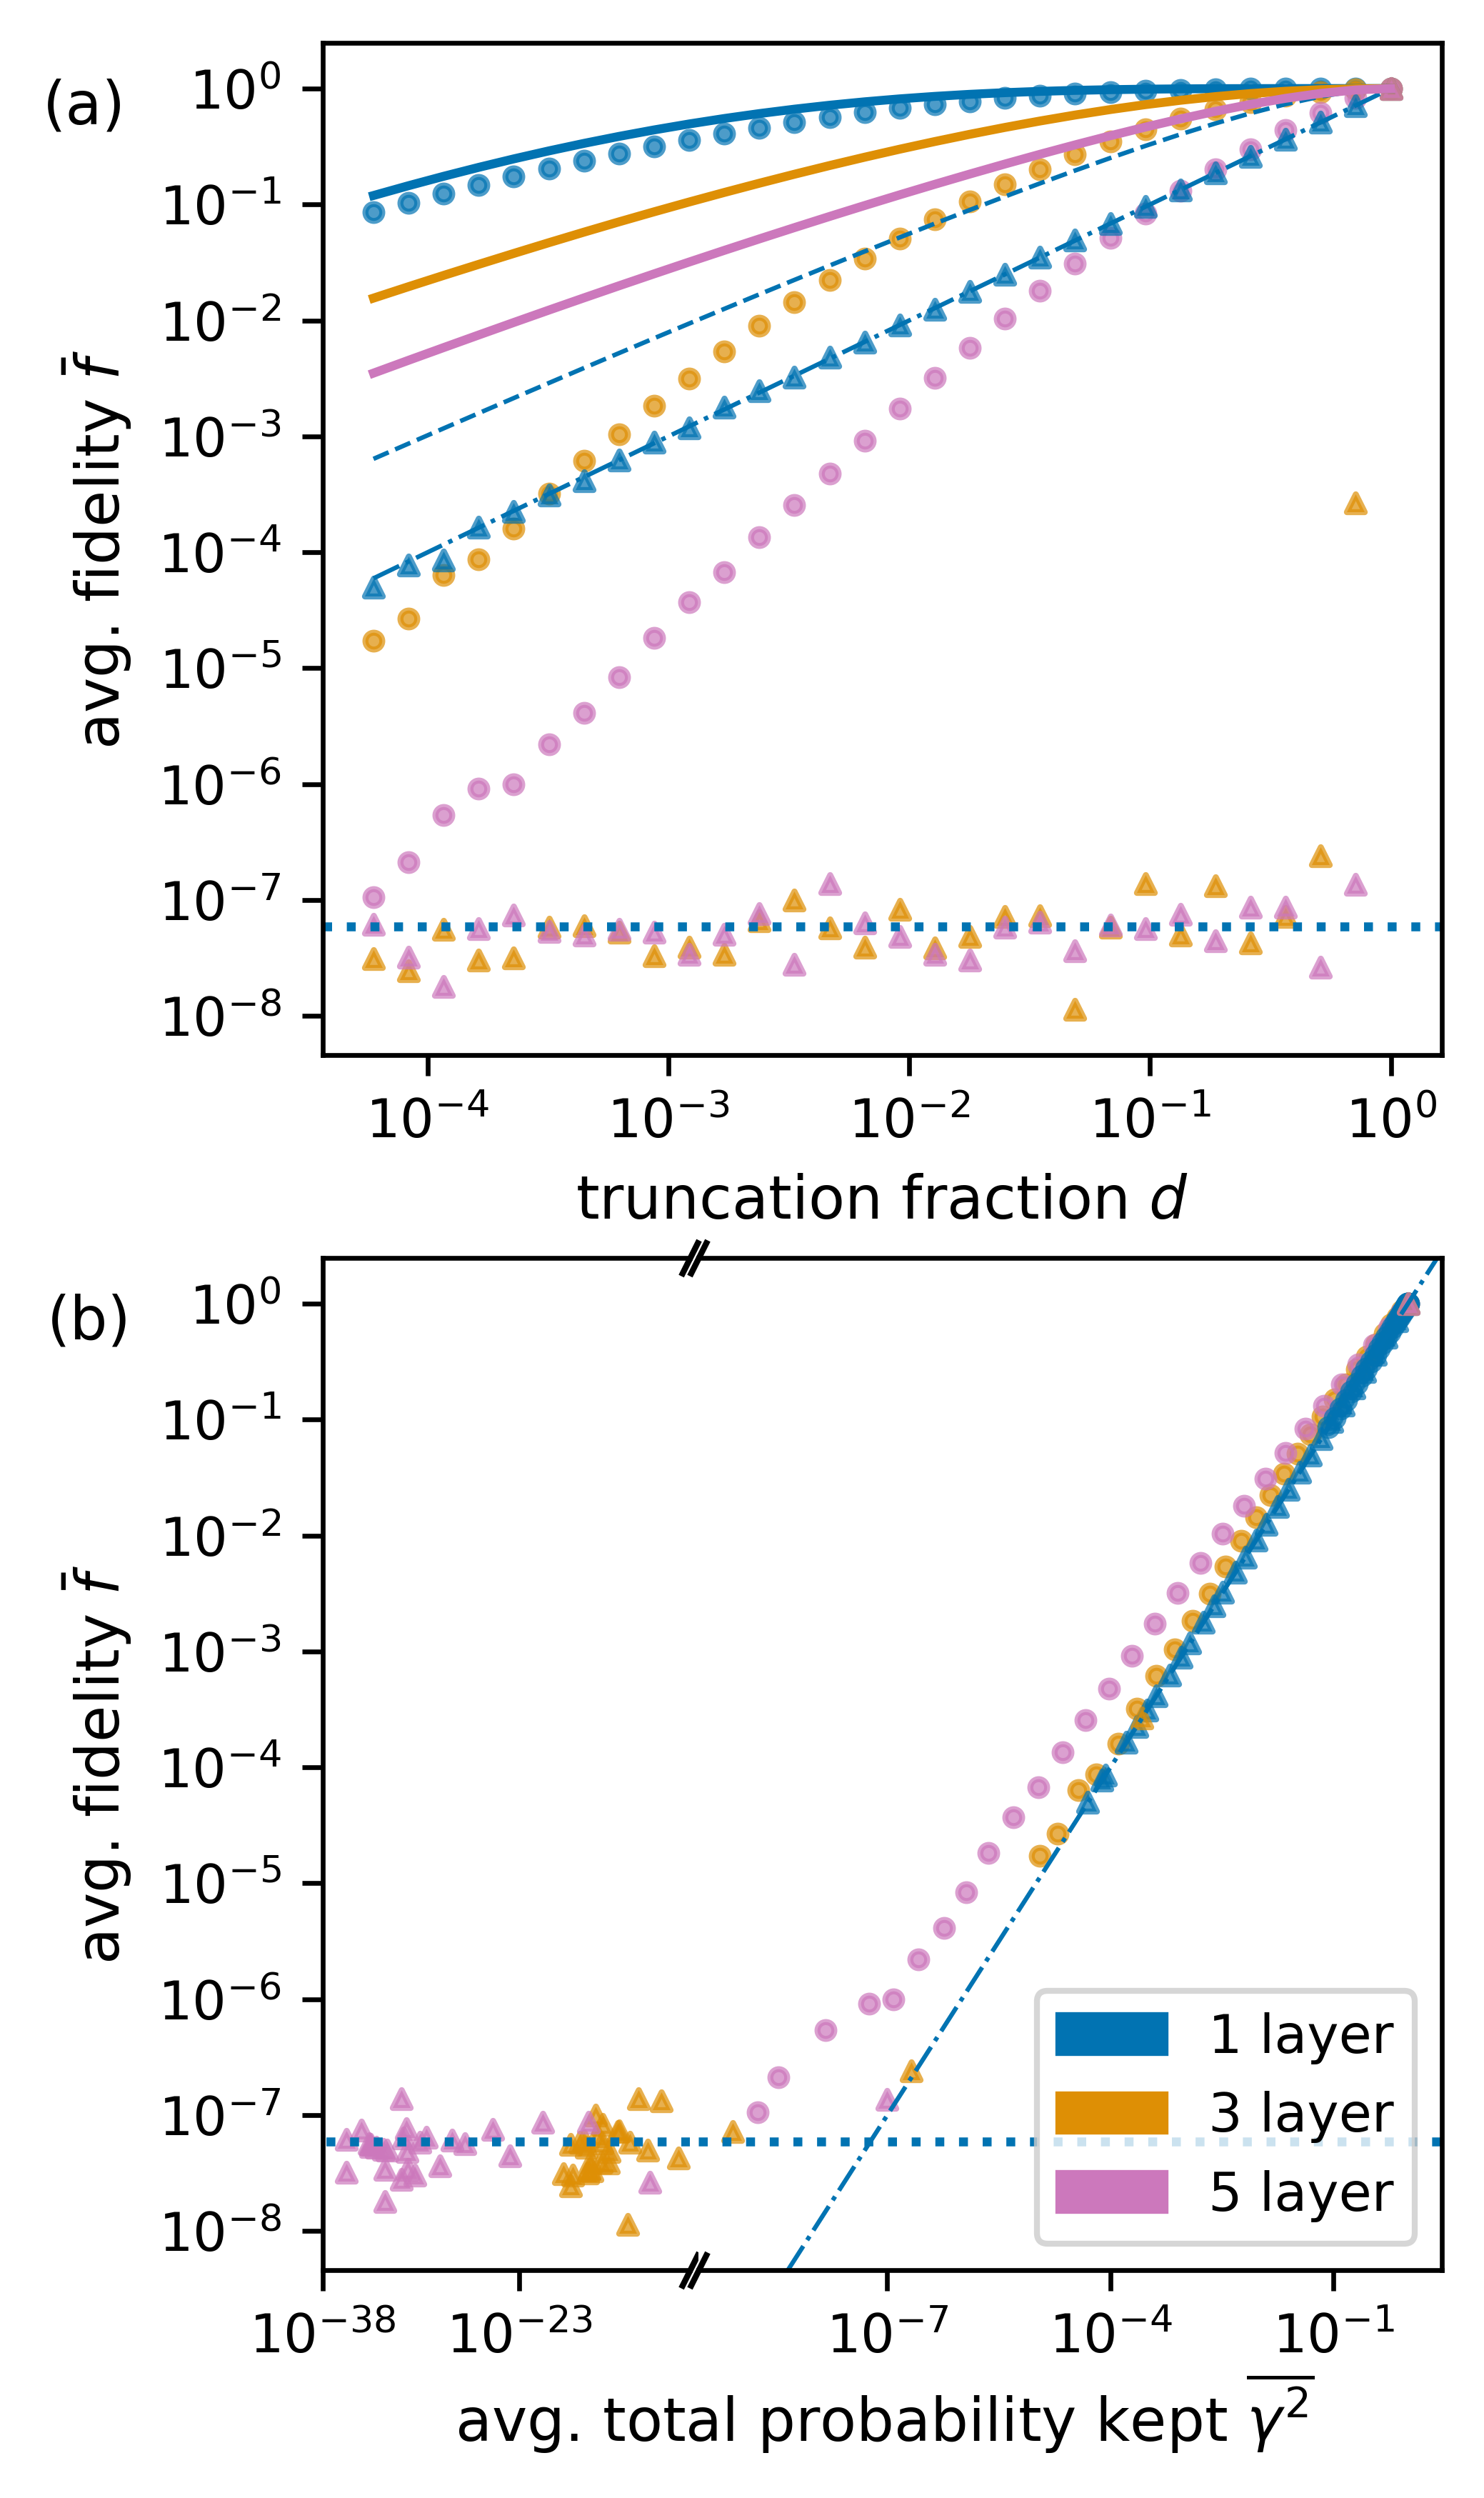

In [134]:

fig, ax = plt.subplot_mosaic(
    """
    CCCCCC
    AABBBB
    """,
    figsize=(w,h),
    dpi=600,
    sharey=True
)
ax["C"].scatter(trunc_frac_t1, avg_fid_t1, label='1 layer, top-k', **top_k_params, **params1)
ax["C"].scatter(trunc_frac_t3, avg_fid_t3, label='3 layers, top-k', **top_k_params, **params3)
ax["C"].scatter(trunc_frac_t5, avg_fid_t5, label='5 layer, top-k', **top_k_params, **params5)
ax["C"].scatter(trunc_frac_r1, avg_fid_r1, label='1 layer, random', **random_params, **params1)
ax["C"].scatter(trunc_frac_r3, avg_fid_r3, label='3 layers, random', **random_params, **params3)
ax["C"].scatter(trunc_frac_r5, avg_fid_r5, label='5 layer, random', **random_params, **params5)

## Theory Lines
ax["C"].plot(trunc_frac_t1, expected(trunc_frac_t1), label='expected1', linestyle="--", linewidth=0.75)
slope_1C = np.logspace(np.log10(trunc_frac_r1[0]), np.log10(trunc_frac_r1[-1]), 30)
ax["C"].plot(slope_1C, slope_1C, label='slope 1 line', c='C0', linestyle='-.', linewidth=0.75)

# ax["C"].axline((0,0), (1,1), label='slope 1 line', linestyle="-.", linewidth=0.75)
ax["C"].axhline(y=1/2**24, linestyle=':')
ax["C"].plot(upperlim_1["n_kept"]/2**upperlim_1["n_qbits"], upperlim_1["fidelity"], **params1)
ax["C"].plot(upperlim_3["n_kept"]/2**upperlim_3["n_qbits"], upperlim_3["fidelity"], **params3)
ax["C"].plot(upperlim_5["n_kept"]/2**upperlim_5["n_qbits"], upperlim_5["fidelity"], **params5)

ax["C"].set_ylabel('avg. fidelity $\\bar{f}$', **ax_label_args)
ax["C"].set_xlabel('truncation fraction $d$', **ax_label_args, **x_label_args)
ax["C"].set_xscale('log')
ax["C"].set_yscale('log')

# spillage onto the other side of the broken axis
splitter3 = 4
splitter5 = 2

ax["B"].scatter(avg_prob_t3, avg_fid_t3, label='3 layers, top-k', **top_k_params, **params3)
ax["B"].scatter(avg_prob_t5, avg_fid_t5, label='5 layer, top-k', **top_k_params, **params5)

ax["B"].scatter(avg_prob_t1, avg_fid_t1, label='1 layer, top-k', **top_k_params, **params1)
ax["B"].scatter(avg_prob_r1, avg_fid_r1, label='1 layer, random', **random_params, **params1)

ax["A"].scatter(avg_prob_r3[:-1*splitter3], avg_fid_r3[:-1*splitter3], label='3 layers, random', **random_params, **params3)
ax["A"].scatter(avg_prob_r5[:-1*splitter5], avg_fid_r5[:-1*splitter5], label='5 layer, random', **random_params, **params5)
ax["B"].scatter(avg_prob_r3[-1*splitter3:], avg_fid_r3[-1*splitter3:], label='3 layers, random', **random_params, **params3)
ax["B"].scatter(avg_prob_r5[-1*splitter5:], avg_fid_r5[-1*splitter5:], label='5 layer, random', **random_params, **params5)

ax["A"].set_xscale('log')
ax["A"].set_yscale('log')

ax["A"].tick_params(**tick_params)
ax["B"].tick_params(**tick_params)
ax["C"].tick_params(**tick_params)

ax["B"].axline((0,0), (1,1), label='slope 1 line', linestyle="-.", linewidth=0.75)
ax["B"].axhline(y=1/2**24, xmin=avg_prob_t5[0], xmax=avg_prob_t5[-1], linestyle=':')
ax["A"].axhline(y=1/2**24, xmin=avg_prob_r5[-1], xmax=avg_prob_r3[0], linestyle=':')

ax["A"].set_ylabel('avg. fidelity $\\bar{f}$', **ax_label_args)
ax["B"].set_xlabel('avg. total probability kept $\\overline{\\gamma^2}$', **ax_label_args, **x_label_args)
ax["B"].set_xscale('log')
ax["B"].set_yscale('log')
ax["B"].tick_params(
    axis="y", which="both", left=False, right=True, labelleft=False, labelright=True
)
ax["A"].minorticks_off()
ax["B"].minorticks_off()
ax["C"].minorticks_off()

ax["A"].spines["right"].set_visible(False)
ax["B"].spines["left"].set_visible(False)


ax["B"].tick_params(axis="y", left=False)
ax["B"].tick_params(axis="y", right=False, labelright=False)
blue_patch = mpatches.Patch(color="C0", label="1 layer")
orange_patch = mpatches.Patch(color="C1", label="3 layer")
purple_patch = mpatches.Patch(color="C4", label="5 layer")
ax["B"].legend(
    handles=[blue_patch, orange_patch, purple_patch],
    fontsize=legend_params["fontsize"],
    loc="lower right",
)

d = 2  # proportion of vertical to horizontal extent of the slanted line
broken_axis_args = dict(
    marker=[(-1, -d), (1, d)],
    markersize=6,
    linestyle="none",
    color="k",
    mec="k",
    mew=1,
    clip_on=False,
)
ax["A"].plot([1, 1], [0, 1], transform=ax["A"].transAxes, **broken_axis_args)
ax["B"].plot([0, 0], [1, 0], transform=ax["B"].transAxes, **broken_axis_args)
ax["A"].set_xlim(10**-38, 10**-10)
ax["B"].xaxis.set_label_coords(x=0.25, y=-0.1)
ax["A"].text(-0.25 * 3, 0.92, "(b)", transform=ax["A"].transAxes, size=subfig_params["fontsize"])
ax["C"].text(-0.25, 0.92, "(a)", transform=ax["C"].transAxes, size=subfig_params["fontsize"])

# plt.subplots_adjust(
#     left=-0.1, wspace=0.05, hspace=0.2, top=0.95
# )
plt.subplots_adjust(wspace=0.05, hspace=0.2, top=0.95)
out_path = "../results/trunc_vs_fidelity.png"
plt.savefig(out_path, dpi=600)

print(os.path.abspath(out_path))


# Stacked Runtime Figures


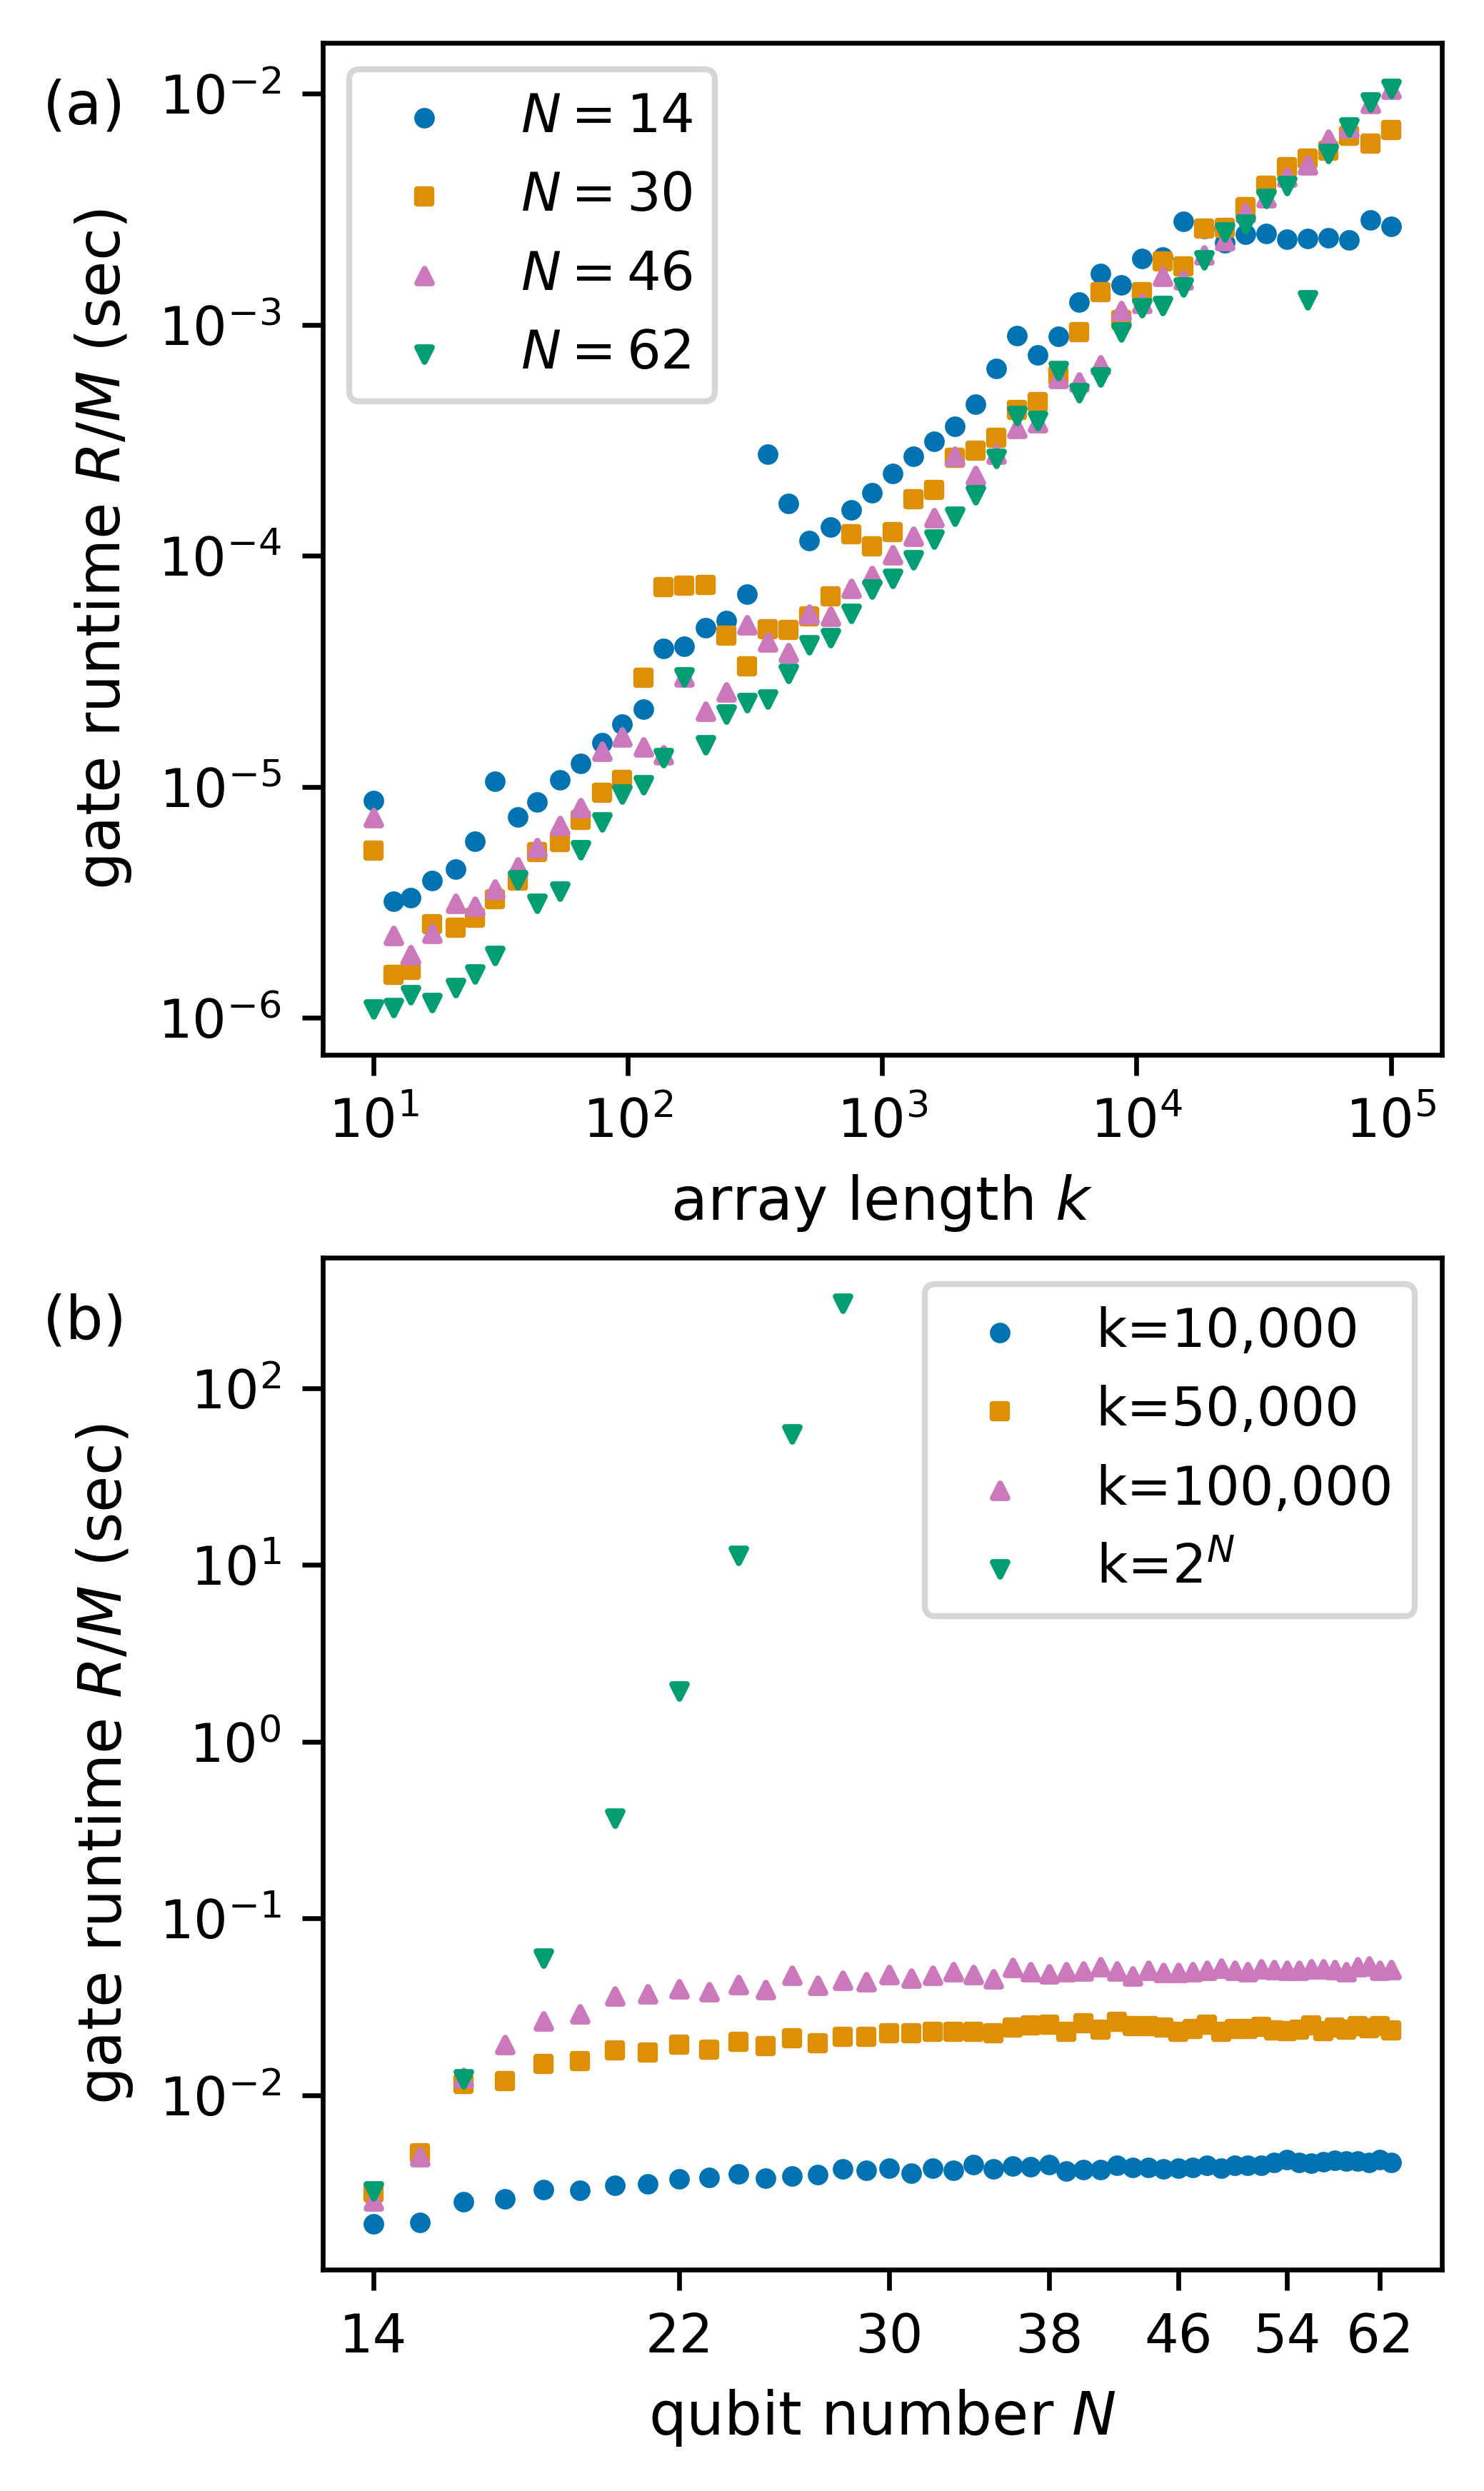

'/home/jsonp/sparse-circuit/results/runtime_data/trust_bitwise_runtime_stacked_5layers.png'

In [121]:
results_dir = "../results/runtime_data"

symbol_list = ["o", "s", "^", "v", "D", "P", "X", "*", "h", "H", "8", "d"]
color_list = ["C0", "C1", "C4", "C2"]

def quadratic_polynomial(x, a, b, c):
    return a * x**2 + b * x**1 + c


def data_str_format_q(n_layers, k_val, cull_method="naive", superpos=None):
    if superpos is not None:
        return f"runtime_superpos_{n_layers}_{k_val}k.pkl"  # potentially a better guardrail needed
    else:
        return f"trust_runtime_{n_layers}layer_kval_{k_val}_{cull_method}_bitwise.pkl"


def get_no_trunc_data():
    data_paths = glob.glob(os.path.join("../results", "runtime_no_trunc_*.pkl"))
    data_dict = {"n_qbits_list": [], "runtimes": [], "k_val": []}
    for p in data_paths:
        loaded_data = sc.load_run_data(p)
        data_dict["n_qbits_list"].append(loaded_data["n_qbits"])
        data_dict["runtimes"].append(
            loaded_data["runtime"]
        )  # forgot an s in the saved data
        data_dict["k_val"].append(2 ** int(loaded_data["n_qbits"]))

    for key, value in data_dict.items():
        if isinstance(value, list):
            data_dict[key] = np.array(value)
    return data_dict


def data_str_format_k(n_layers, cull_method="naive", run_num=0):
    return f"trust_runtime_vs_k_{n_layers}layer_{cull_method}_bitwise_run{run_num}.pkl"


def stacked_runtime_plots(
    n_layers, SAVE=False, SHOW=False, cull_method="naive", run_num=0, out_path=""
):
    
    # ==========================
    # Load runtime vs k data
    # ==========================
    data = sc.load_run_data(
        os.path.join(results_dir, data_str_format_k(n_layers, cull_method, run_num))
    )

    n_qbits_list = np.array(data["n_qbits_list"])
    k_vals = np.array(data["k_vals"])
    runtimes = np.array(data["runtimes"])  # shape (n_qbits, n_kvals)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(w, h), dpi=600)
    for i, n_qbits in enumerate(n_qbits_list[::8]):
        runtime_row = runtimes[:, i]
        n_gates = n_layers * (n_qbits // 2)
        normalized_runtime = runtime_row / n_gates

        ax1.scatter(
            k_vals,
            normalized_runtime,
            color=color_list[i % len(color_list)],
            marker=symbol_list[i % len(symbol_list)],
            s=6,
            label=f"$N={n_qbits}$",
        )

    ax1.set_xlabel("array length $k$", **ax_label_args)
    ax1.set_ylabel("gate runtime $R/M$ (sec)", **ax_label_args)
    ax1.legend(fontsize=9)
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.tick_params(axis="both", which="both", labelsize=9)
    ax1.tick_params(axis="x", which="minor", bottom = False)
    ax1.tick_params(axis="y", which="minor", left = False)
    ax1.text(-0.25, 0.92, "(a)", transform=ax1.transAxes, size=subfig_params["fontsize"])
    
    # ==========================
    # Load runtime vs N data
    # ==========================
    data_10k = sc.load_run_data(
        os.path.join(results_dir, data_str_format_q(n_layers, 10_000))
    )
    data_50k = sc.load_run_data(
        os.path.join(results_dir, data_str_format_q(n_layers, 50_000))
    )
    data_100k = sc.load_run_data(
        os.path.join(results_dir, data_str_format_q(n_layers, 100_000))
    )

    data_fullk = get_no_trunc_data()

    data_store = [data_10k, data_50k, data_100k, data_fullk]

    for i, data in enumerate(data_store):
        qbits = data["n_qbits_list"]
        runtimes = data["runtimes"]
        n_gates_list = qbits / 2 * n_layers

        if i > 2:
            runtimes /= n_gates_list
            ax2.scatter(
                qbits,
                runtimes,
                color=color_list[i % 4],
                marker=symbol_list[i % 4],
                s=6,
                label="k=$2^{{N}}$",
            )
        else:
            full_q = qbits
            runtimes_avged = np.mean(runtimes, axis=0)
            runtimes_avged /= n_gates_list

            ax2.scatter(
                qbits,
                runtimes_avged,
                color=color_list[i % 4],
                marker=symbol_list[i % 4],
                s=6,
                label=f"k={data['k_val']:,}",
            )

    ax2.set_xlabel("qubit number $N$", **ax_label_args)
    ax2.set_ylabel("gate runtime $R/M$ (sec)", **ax_label_args)
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.tick_params(axis="both", which="both", labelsize=tick_params["labelsize"])
    ax2.tick_params(axis="x", which="minor", bottom = False)
    ax2.tick_params(axis="y", which="minor", left = False)
    ax2.legend(loc="best", fontsize=legend_params["fontsize"])
    ax2.text(-0.25, 0.92, "(b)", transform=ax2.transAxes, size=subfig_params["fontsize"])
    tick_labels = full_q[::8]
    ax2.set_xticks(tick_labels)
    ax2.xaxis.set_minor_locator(mticker.NullLocator())
    tick_text_labels = [str(label) for label in tick_labels]
    ax2.set_xticklabels(tick_text_labels)
    # plt.subplots_adjust(left=-0.1, wspace=0.05, hspace=0.2, top=0.95)
    plt.subplots_adjust(wspace=0.05, hspace=0.2, top=0.95)
    # plt.tight_layout()
    out_path = os.path.join(
        results_dir, f"trust_bitwise_runtime_stacked_{n_layers}layers.png"
    )
    
    if SAVE:
        plt.savefig(out_path, dpi=600)
    if SHOW:
        plt.show()

    return os.path.abspath(out_path)
stacked_runtime_plots(n_layers=5, SAVE=True, SHOW=True)


In [122]:
results_dir = "../results/trust_vs_mps"

def data_str_format(n_qubits, n_layers, run_num):
    return f"{n_qubits}qbit_{n_layers}layer_naive_bitwise_run{run_num}.pkl"

df5 = pd.read_pickle(os.path.join(results_dir, data_str_format(24, 5, 0)))

def load_all_runs(n_qubits, n_layers, run_range=range(10), results_dir=results_dir):
    dfs = []
    for run_num in run_range:
        path = os.path.join(results_dir, data_str_format(n_qubits, n_layers, run_num))
        if not os.path.exists(path):
            print(f"Missing: {path}")
            continue
        try:
            obj = pd.read_pickle(path)
            if isinstance(obj, dict):
                df = pd.DataFrame(obj)
            elif isinstance(obj, pd.DataFrame):
                df = obj
            else:
                print(f"Unknown data type in {path}: {type(obj)} — skipping.")
                continue
            dfs.append(df)
        except Exception as e:
            print(f"Failed to load {path}: {e}")
            continue

    if not dfs:
        raise FileNotFoundError(
            f"No valid runs found for {n_qubits}qbits, {n_layers}layers"
        )

    return pd.concat(dfs, ignore_index=True)


# Stacked Fidelity vs Runtime


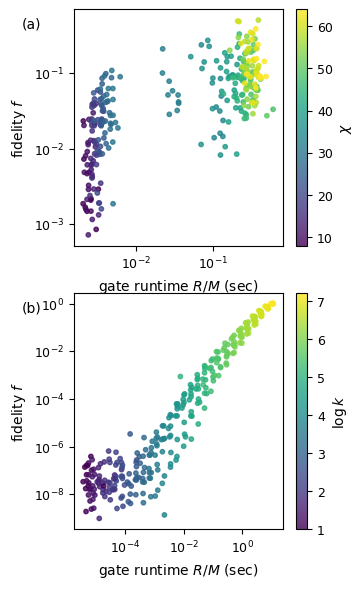

'/home/jsonp/sparse-circuit/results/compare_mps_trust_fidelity_vs_runtime.png'

In [123]:
def compare_mps_trust_fidelity_vs_runtime(
    n_layers,
    n_qbits,
    mps_results_dir="../results/trust_vs_mps",
    trust_results_dir="../results/trust_vs_mps",
    bond_dim_list=np.arange(8, 64 + 2, 2),
    run_nums=range(10),
    SAVE=False,
    save_path="../results/compare_mps_trust_fidelity_vs_runtime.png",
):
    """
    Generate a vertically stacked figure comparing MPS fidelity vs runtime
    against TRuST-bitwise fidelity vs runtime.

    """

    # ==========================
    # Load MPS data
    # ==========================
    mps_data = {"fidelity": [], "runtime": [], "bond_dim": []}

    for bond, run_num in product(bond_dim_list, run_nums):
        fname = os.path.join(
            mps_results_dir,
            f"mps_{n_qbits}qbit_{n_layers}layers_{bond}_bond_run{run_num}.pkl",
        )
        if not os.path.exists(fname):
            continue

        d = sc.load_run_data(fname)
        mps_data["fidelity"].append(d["fidelity"])
        mps_data["runtime"].append(d["time_taken"])
        mps_data["bond_dim"].append(d["max_bond_dim"])

    if not mps_data["fidelity"]:
        print("Warning: no MPS data found.")

    fidel_mps = np.array(mps_data["fidelity"]).flatten()
    runtimes_mps = np.array(mps_data["runtime"])
    bonds_mps = np.array(mps_data["bond_dim"])

    n_gates = n_layers * (n_qbits // 2)
    norm_runtime_mps = runtimes_mps / n_gates

    # ==========================
    # Load TRuST-bitwise data
    # ==========================
    df_trust = load_all_runs(
        n_qubits=n_qbits,
        n_layers=n_layers,
        run_range=run_nums,
        results_dir=trust_results_dir,
    )

    runtime_trust = df_trust["runtimes"]
    fidelity_trust = df_trust["fidelity"]
    n_kept_trust = df_trust["n_kept"]
    norm_runtime_trust = runtime_trust / n_gates
    # ==========================
    # Build figure
    # ==========================
    # w = 3.37

    fig, axs = plt.subplots(2, 1, figsize=(w, h), sharex=False)

    # --------------------------
    # TOP: MPS
    # --------------------------
    sc0 = axs[0].scatter(
        norm_runtime_mps,
        fidel_mps,
        c=bonds_mps,
        cmap="viridis",
        s=10,
        alpha=0.8,
    )
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    axs[0].set_xlabel("gate runtime $R/M$ (sec)", **ax_label_args)
    axs[0].set_ylabel("fidelity $f$", **ax_label_args)
    axs[0].tick_params(axis="both", which="both", labelsize=tick_params["labelsize"])
    axs[0].tick_params(axis="x", which="minor", bottom = False)
    axs[0].tick_params(axis="y", which="minor", left = False)
    axs[0].text(-0.25, 0.92, "(a)", transform=axs[0].transAxes, size=subfig_params["fontsize"])

    cbar0 = fig.colorbar(sc0, ax=axs[0])
    cbar0.set_label(r"$\chi$", **ax_label_args)
    cbar0.ax.tick_params(**tick_params)
    # --------------------------
    # BOTTOM: TRuST-bitwise
    # --------------------------
    sc1 = axs[1].scatter(
        norm_runtime_trust,
        fidelity_trust,
        c=np.log10(n_kept_trust),
        cmap="viridis",
        s=10,
        alpha=0.8,
    )
    axs[1].set_xscale("log")
    axs[1].set_yscale("log")
    axs[1].set_xlabel("gate runtime $R/M$ (sec)", **ax_label_args)
    axs[1].set_ylabel("fidelity $f$", **ax_label_args)
    
    axs[1].tick_params(axis="both", which="both", labelsize=tick_params["labelsize"])
    axs[1].tick_params(axis="x", which="minor", bottom = False)
    axs[1].tick_params(axis="y", which="minor", left = False)
    
    axs[1].text(-0.25, 0.92, "(b)", transform=axs[1].transAxes, size=subfig_params["fontsize"])
    cbar1 = fig.colorbar(sc1, ax=axs[1])
    cbar1.set_label(r"$\log k$", **ax_label_args)
    cbar1.ax.tick_params(**tick_params)
    # plt.subplots_adjust(
    #     left=-0.1, wspace=0.05, hspace=0.2, top=0.95
    # )
    plt.subplots_adjust(wspace=0.05, hspace=0.2, top=0.95)

    if SAVE:
        fig.savefig(save_path, dpi=600)

    plt.show()

    return os.path.abspath(save_path)


compare_mps_trust_fidelity_vs_runtime(n_layers=5, n_qbits=24, SAVE=True)
